In [16]:
import numpy as np
import matplotlib.pyplot as plt
def nSidedDie(p):
    choices = [i + 1 for i in range(len(p))]
    choice = np.random.choice(choices, p = p)
    return choice

In [17]:
p=[0.2,  0.1,  0.15, 0.3, 0.2, 0.05]

In [18]:
def single_roll(p):
    die1 = nSidedDie(p)
    die2 = nSidedDie(p)
    die3 = nSidedDie(p)
    return die1 == 1 and die2 == 2 and die3 == 3

In [19]:
def single_experiment(n_iterations, p):
    X = 0
    for _ in range(n_iterations):
        X += single_roll(p)
    return X

In [21]:
def experiments(n_experiments, n_iterations, p):
    experiment_results = []
    for _ in range(n_experiments):
        experiment_results.append(single_experiment(n_iterations, p))
    return experiment_results

In [22]:
def plot(n_experiments, n_iterations, p):
    experiment_results = experiments(n_experiments, n_iterations, p)
    b = range(0, max(experiment_results))
    sb = len(b)
    h1, bin_edges = np.histogram(experiment_results, b)
    b1 = bin_edges[0: sb - 1]
    plt.close()
    
    p1 = h1 / n_experiments
    plt.stem(b1, p1)
    plt.title("Bernoulli Trials: PMF - Experimental Results")
    plt.xlabel("Number of successes in n=1000 trials")
    plt.ylabel("Probability")
    plt.show()

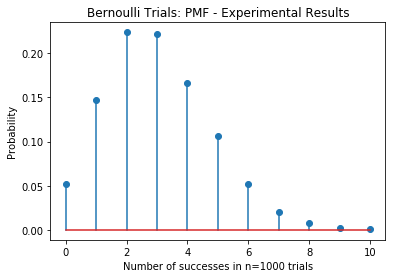

In [23]:
n_experiments = 10000
n_iterations = 1000
plot(n_experiments, n_iterations, p)

# Problem 2

In [110]:
import numpy as np
import matplotlib.pyplot as plt

def binomial_trials(n, k, p):
    n_factorial = np.math.factorial(n)
    k_factorial = np.math.factorial(k)
    n_minus_k_factorial = np.math.factorial(n-k)
    n_choose_k = (n_factorial / (k_factorial * n_minus_k_factorial))
    p_super_k = p ** k 
    p_complement_super_k = (1 - p)**(n - k)
    return n_choose_k * p_super_k * p_complement_super_k
    
    

In [111]:
def experiments(n_trials,p):
    experiment_results = []
    # since for k greater than 9 the probability is extremely small 
    # I only calculate up to 9
    for k in range(10):
        experiment_results.append(binomial_trials(n_trials, k, p))
    return experiment_results

In [112]:
def plot(n_iterations, p):
    experiment_results = experiments(n_iterations, p)
    b = range(0, 10)
    sb = len(b)
    h1, bin_edges = np.histogram(experiment_results, b)
    b1 = bin_edges[0: sb]
    plt.close()
    
    plt.stem(b1, experiment_results)
    plt.title("Bernoulli Trials: PMF - Binomial Formula")
    plt.xlabel("Number of successes in n=1000 trials")
    plt.ylabel("Probability")
    plt.show()

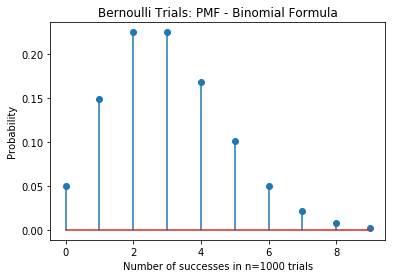

In [113]:
p=[0.2,  0.1,  0.15, 0.3, 0.2, 0.05]
probability_p = p[0] * p[1] * p[2] # since dice rolls are independent of each other
n_iterations = 1000
plot(n_iterations, probability_p)

# Problem 3

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def poisson_trials(lambda_value, k):
    lamba_super_k = lambda_value ** k
    e_super_neg_k = np.math.exp( -lambda_value )
    k_factorial = np.math.factorial(k)
    return (lamba_super_k * e_super_neg_k) / (k_factorial)
    
    

In [115]:
def experiments(n_trials,p):
    experiment_results = []
    lambda_value = n_trials * p
    for k in range(10):
        experiment_results.append(poisson_trials(lambda_value, k))
    return experiment_results

In [116]:
def plot(n_iterations, p):
    experiment_results = experiments(n_iterations, p)
    b = range(0, 10)
    sb = len(b)
    h1, bin_edges = np.histogram(experiment_results, b)
    b1 = bin_edges[0: sb]
    plt.close()
    
  
    plt.stem(b1, experiment_results)
    plt.title("Bernoulli Trials: PMF - Poisson Approximation")
    plt.xlabel("Number of successes in n=1000 trials")
    plt.ylabel("Probability")
    plt.show()

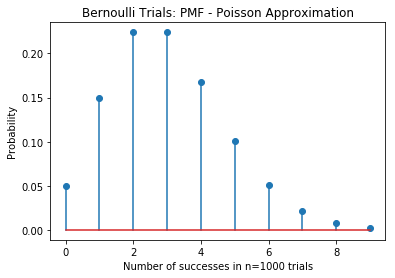

In [117]:
probability_p = p[0] * p[1] * p[2] # since dice rolls are independent of each other
n_iterations = 1000
plot(n_iterations, probability_p)